# Tutorial 5 MLP

- Keras
- MLP for text classification

In [1]:
# !pip install nltk
# !pip install numpy
# !pip install pandas
# !pip install keras
# !pip install matplotlib
# !pip install tensorflow

In [2]:
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torch.optim import Adam,SGD
import torch
class t5Dataset(Dataset):
    def __init__(self,data,labels):
        self.data_array = data
        self.data_labels = labels
    def __len__(self):
        return len(self.data_labels)
    def __getitem__(self,idx):
        label = self.data_labels[idx]
        training_instance = self.data_array[idx]
        return training_instance,label

In [3]:
class singleLayerNet(nn.Module):
    def __init__(self,**kwargs):
        super(singleLayerNet,self).__init__(**kwargs)
        self.dense_layer = nn.Linear(in_features=2,out_features=2)
        self.final_unit = nn.Linear(in_features = 2, out_features=1)
        # self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        out = self.dense_layer(x)
        out = self.final_unit(out)
        # out = self.sigmoid(out)
        return out

# Introduction to Keras/Pytorch

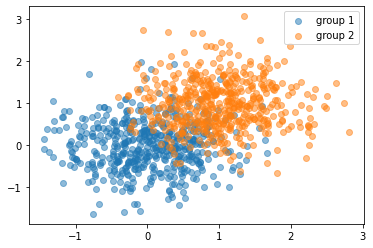

In [4]:
# a simple classificaiton task

import numpy as np
import matplotlib.pyplot as plt

N = 500
np.random.seed(43897)
group1 = np.random.normal(loc=0.0, scale=0.6, size=[N, 2])
group2 = np.random.normal(loc=1, scale=0.6, size=[N, 2])

plt.scatter(group1[:,0], group1[:, 1], label="group 1", alpha=0.5)
plt.scatter(group2[:,0], group2[:, 1], label="group 2", alpha=0.5)
plt.legend()
plt.show()

In [5]:
shuffle_idx = np.random.permutation(2*N)
X = np.vstack((group1, group2))[shuffle_idx]
y = np.vstack((np.hstack((np.ones([N, 1]), np.zeros([N, 1]))), 
              np.hstack((np.zeros([N, 1]), np.ones([N, 1])))) )[shuffle_idx]
y = np.vstack((np.ones((N,1)), np.zeros((N,1))))[shuffle_idx]

In [6]:
print("size of all dataset", X.shape, y.shape)
train_X = X[:int(2*N*0.8), :]
train_y = y[:int(2*N*0.8), :]
dev_X = X[int(2*N*0.8):int(2*N*0.9), :]
dev_y = y[int(2*N*0.8):int(2*N*0.9), :]
test_X = X[int(2*N*0.9):, :]
test_y = y[int(2*N*0.9):, :]
print("size of training set: {}, size of dev set: {}, size of test set:{}.".format(train_X.shape, dev_X.shape, test_X.shape))

size of all dataset (1000, 2) (1000, 1)
size of training set: (800, 2), size of dev set: (100, 2), size of test set:(100, 2).


### Equation of the perceptron model:

Input: Vector $X$, labels $y\_$.

$y = W^\top X + b$

$X\in \mathbb{R}^2, W\in \mathbb{R}^{2\times2}, b\in \mathbb{R}^2$

In [7]:
train_ds = t5Dataset(train_X,train_y)
dev_ds = t5Dataset(dev_X,dev_y)
test_ds = t5Dataset(test_X,test_y)
train_dl = DataLoader(train_ds,batch_size=10)
dev_dl = DataLoader(dev_ds,batch_size=10)
test_dl = DataLoader(test_ds,batch_size=10)

In [8]:
def check_accuracy(model,dataloader):
    model.eval()
    correct_total = 0
    total_instances = 0
    with torch.no_grad():
        for batch,(x,y) in enumerate(dataloader):
            x = x.type(torch.FloatTensor)
            y = y.type(torch.FloatTensor)
            out = model(x)
            # out = out.to('cpu')
            # print(out)
            # _,max_index = out.max(dim = 1)
            out[torch.where(out >= 0.5)[0]] = 1
            out[torch.where(out < 0.5)[0]] = 0
            # print(max_index)
            # y = torch.where(y == 1)[1]
            correct_total += (out == y).sum()
            total_instances += len(y)
    acc = float(correct_total)/total_instances
    return acc

In [9]:
model_torch = singleLayerNet()
adam_optim = SGD(model_torch.parameters(),lr = 0.1)
loss_fn = nn.BCEWithLogitsLoss()
model_torch.train()
for epoch in range(10):
    print("--------------")
    print(f"Doing epoch {epoch}")
    training_loss = 0
    for i,(X,y) in enumerate(train_dl):
        out = model_torch(X.type(torch.FloatTensor))
        loss = loss_fn(out,y.type(torch.FloatTensor))
        training_loss += loss.item()
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()
    avg_loss_on_epoch = loss/len(train_dl)
    print(f"Average Training Loss {avg_loss_on_epoch}")
    training_accuracy = check_accuracy(model_torch,train_dl)
    validation_accuracy = check_accuracy(model_torch,dev_dl)
    print(f"Training accuracy : {training_accuracy}")
    print(f"Validation accuracy : {validation_accuracy}")
    print("--------------")

--------------
Doing epoch 0
Average Training Loss 0.005546558648347855
Training accuracy : 0.74375
Validation accuracy : 0.73
--------------
--------------
Doing epoch 1
Average Training Loss 0.004321642220020294
Training accuracy : 0.86875
Validation accuracy : 0.85
--------------
--------------
Doing epoch 2
Average Training Loss 0.0040079643949866295
Training accuracy : 0.8825
Validation accuracy : 0.88
--------------
--------------
Doing epoch 3
Average Training Loss 0.0038922533858567476
Training accuracy : 0.885
Validation accuracy : 0.88
--------------
--------------
Doing epoch 4
Average Training Loss 0.0038414367008954287
Training accuracy : 0.88375
Validation accuracy : 0.86
--------------
--------------
Doing epoch 5
Average Training Loss 0.003817205782979727
Training accuracy : 0.88625
Validation accuracy : 0.87
--------------
--------------
Doing epoch 6
Average Training Loss 0.0038051209412515163
Training accuracy : 0.8875
Validation accuracy : 0.87
--------------
------

In [10]:
for i,(X,y) in enumerate(test_dl):
    X = X.type(torch.FloatTensor)
    out = model_torch(X)
    out[torch.where(out >= 0.5)[0]] = 1
    out[torch.where(out < 0.5)[0]] = 0
    print(f"Batch {i} ---------")
    print(out)
    print(y)
    print(f"-------------------")

Batch 0 ---------
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]], grad_fn=<IndexPutBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]], dtype=torch.float64)
-------------------
Batch 1 ---------
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.]], grad_fn=<IndexPutBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]], dtype=torch.float64)
-------------------
Batch 2 ---------
tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.]], grad_fn=<IndexPutBackward0>)
tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
  

In [11]:
check_accuracy(model_torch,test_dl)

0.84

In [12]:
shuffle_idx = np.random.permutation(2*N)
X = np.vstack((group1, group2))[shuffle_idx]
y = np.vstack((np.hstack((np.ones([N, 1]), np.zeros([N, 1]))), 
              np.hstack((np.zeros([N, 1]), np.ones([N, 1])))) )[shuffle_idx]
# y = np.vstack((np.ones((N,1)), np.zeros((N,1))))[shuffle_idx]

In [13]:
print("size of all dataset", X.shape, y.shape)
train_X = X[:int(2*N*0.8), :]
train_y = y[:int(2*N*0.8), :]
dev_X = X[int(2*N*0.8):int(2*N*0.9), :]
dev_y = y[int(2*N*0.8):int(2*N*0.9), :]
test_X = X[int(2*N*0.9):, :]
test_y = y[int(2*N*0.9):, :]
print("size of training set: {}, size of dev set: {}, size of test set:{}.".format(train_X.shape, dev_X.shape, test_X.shape))

size of all dataset (1000, 2) (1000, 2)
size of training set: (800, 2), size of dev set: (100, 2), size of test set:(100, 2).


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from keras.callbacks import ModelCheckpoint
import os
if not os.path.exists("./models/"):
    os.mkdir("models")
    
checkpoint_path = "./models/weights.hdf5"    
checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

learning_rate = 0.1

output_size = 2 # num_class
input_size = 2 # num dimension

model = Sequential()
model.add(Dense(output_size, input_shape=(input_size,), activation="softmax"))

model.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=learning_rate), 
              metrics=["accuracy"])

model.fit(train_X, train_y, epochs=10, batch_size=10, verbose=0,
         validation_data=(dev_X, dev_y), callbacks=[checkpointer])

loss_train, accuracy_train = model.evaluate(train_X, train_y)

print("acc of training set = {:.2f}".format(accuracy_train))

loss_test, accuracy_test = model.evaluate(test_X, test_y)
print("acc of testing set = {:.2f}".format(accuracy_test))

model.load_weights(checkpoint_path)

loss_test, accuracy_test = model.evaluate(test_X, test_y)
print("acc of testing set = {:.2f}".format(accuracy_test))

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(



Epoch 00001: val_loss improved from inf to 0.49969, saving model to ./models\weights.hdf5

Epoch 00002: val_loss improved from 0.49969 to 0.41042, saving model to ./models\weights.hdf5

Epoch 00003: val_loss improved from 0.41042 to 0.36336, saving model to ./models\weights.hdf5

Epoch 00004: val_loss improved from 0.36336 to 0.33513, saving model to ./models\weights.hdf5

Epoch 00005: val_loss improved from 0.33513 to 0.31588, saving model to ./models\weights.hdf5

Epoch 00006: val_loss improved from 0.31588 to 0.30356, saving model to ./models\weights.hdf5

Epoch 00007: val_loss improved from 0.30356 to 0.29392, saving model to ./models\weights.hdf5

Epoch 00008: val_loss improved from 0.29392 to 0.28670, saving model to ./models\weights.hdf5

Epoch 00009: val_loss improved from 0.28670 to 0.28124, saving model to ./models\weights.hdf5

Epoch 00010: val_loss improved from 0.28124 to 0.27647, saving model to ./models\weights.hdf5
25/25 [==============================] - 0s 5ms/step -

### Get the prediciton results

In [15]:
Y_pred = model.predict_classes(test_X, batch_size=10, verbose=0)
print(Y_pred)

[1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1]


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


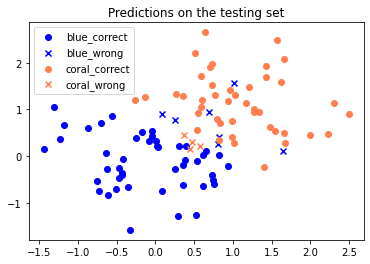

In [16]:
# visialization
# edgecolors
correct_x = [[], []]
wrong_x = [[], []]

for i, (y, y_) in enumerate(zip(Y_pred, test_y)):
    y_ = np.argmax(y_)
    if y == y_:
        correct_x[y_].append(test_X[i])
    else:
        wrong_x[y_].append(test_X[i])
plt.scatter(np.array(correct_x[0])[:, 0], np.array(correct_x[0])[:, 1], color="blue", label="blue_correct")
plt.scatter(np.array(wrong_x[0])[:, 0], np.array(wrong_x[0])[:, 1], color="blue", marker="x", label="blue_wrong")
plt.scatter(np.array(correct_x[1])[:, 0], np.array(correct_x[1])[:, 1], color="coral", label="coral_correct")
plt.scatter(np.array(wrong_x[1])[:, 0], np.array(wrong_x[1])[:, 1], color="coral", marker="x", label="coral_wrong")
plt.title("Predictions on the testing set")
plt.legend()
plt.show()

# MLP in NLP. Text classification

Input features: 1-gram BOW of a sentence.

Output: class

Model: single layer perceptron and 2-layer perceptron

In [36]:
import numpy as np
from scipy import sparse
from collections import Counter
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
import regex
lemmatizer = WordNetLemmatizer()

stopwords = set(stopwords.words("english"))

def load_data(file_name):
    """
    :param file_name: a file name, type: str
    return a list of ids, a list of documents, a list of labels
    """
    df = pd.read_csv(file_name)

    return df['id'], df["text"], df['label']
def load_labels(file_name):
    """
    :param file_name: a file name, type: str
    return a list of labels
    """
    return pd.read_csv(file_name)['label']

def tokenize(text):
    """
    :param text: a doc with multiple sentences, type: str
    return a word list, type: list
    e.g.
    Input: 'Text mining is to identify useful information.'
    Output: ['Text', 'mining', 'is', 'to', 'identify', 'useful', 'information', '.']
    """
    return nltk.word_tokenize(text)
def filter_stopwords(tokens):
    """
    :param tokens: a list of tokens, type: list
    return a list of filtered tokens, type: list
    e.g.
    Input: ['text', 'mine', 'is', 'to', 'identifi', 'use', 'inform', '.']
    Output: ['text', 'mine', 'identifi', 'use', 'inform', '.']
    """
    ### equivalent code
    # results = list()
    # for token in tokens:
    #     if token not in stopwords and not token.isnumeric():
    #         results.append(token)
    # return results

    return [token for token in tokens if token not in stopwords and not token.isnumeric()]
def get_bagofwords(data, vocab_dict):
    '''
    :param data: a list of tokenized documents, type: list
    :param vocab_dict: a mapping from words to indices, type: dict
    return a BOW matrix in Compressed Sparse Row matrix format, type: scipy.sparse.csr_matrix
    '''
    
    '''
    The BOW matrix is first constructed using Row-based list of lists sparse matrix (LIL) format.
    LIL is a convenient format for constructing sparse matrices, as it supports flexible slicing, 
    and it is efficient to change to the matrix sparsity structure.
    '''
    
    data_matrix = sparse.lil_matrix((len(data), len(vocab_dict)))

    for i, doc in enumerate(data):
        for word in doc:
            word_idx = vocab_dict.get(word, -1)
            if word_idx != -1:
                data_matrix[i, word_idx] += 1
                
    '''
    After constructing the BOW matrix on all input documents, we convert the matrix to Compressed Sparse 
    Row (CSR) format for fast arithmetic and matrix vector operations.
    '''
    data_matrix = data_matrix.tocsr()
    
    return data_matrix
def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]
def remove_punctuation(tokens):
    regpat = regex.compile(r"^[A-Za-z0-9\s]+")
    tokens = [i for i in tokens if regpat.search(i)]
    return tokens
def create_word_vocabulary(token_list):
    counter = Counter()
    for tokens in token_list:
        counter.update(tokens)
    vocab = [i for i,j in counter.most_common(len(counter))]
    vocab_dict = dict(zip(vocab,range(len(vocab))))
    return vocab_dict

### preprocessing

In [18]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"
ans_file = "./data/answer.csv"


train_ids, train_texts, train_labels_raw = load_data(train_file)
test_ids, test_texts, _ = load_data(test_file)
test_labels = load_labels(ans_file)

In [19]:
# Transform the labels to logits

num_class = 5

train_labels = np.zeros((len(train_ids), num_class))
train_labels[(list(range(len(train_ids))), list(train_labels_raw-1))] = 1

test_labels = np.zeros((len(test_ids), num_class))
test_labels[(list(range(len(test_ids))), list(load_labels(ans_file)-1))] = 1
print(test_labels[:10, :])
print(load_labels(ans_file)[:10])

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
0    5
1    4
2    5
3    1
4    5
5    4
6    5
7    5
8    5
9    5
Name: label, dtype: int64


In [20]:
print("Size of train set: {}".format(len(train_ids)))
print("Size of test set: {}".format(len(test_ids)))

Size of train set: 2000
Size of test set: 400


In [37]:
#tokenizing
train_tokens = [tokenize(text) for text in train_texts]
test_tokens = [tokenize(text) for text in train_texts]
#lemmatizing
train_tokens = [lemmatize(tokens) for tokens in train_tokens]
test_tokens = [lemmatize(tokens) for tokens in test_tokens]
#remove punctuation
train_tokens = [remove_punctuation(tokens) for tokens in train_tokens]
test_tokens = [remove_punctuation(tokens) for tokens in test_tokens]
#remove stopwords
train_tokens = [filter_stopwords(tokens) for tokens in train_tokens]
test_tokens = [filter_stopwords(tokens) for tokens in test_tokens]

vocab_dict = create_word_vocabulary(train_tokens)

In [40]:
#get bag of words
train_data_matrix = get_bagofwords(train_tokens, vocab_dict)
test_data_matrix = get_bagofwords(test_tokens, vocab_dict)

In [42]:
import sys
sys.getsizeof(train_data_matrix)

48

In [44]:
# # Tokenization
# train_tokens = [tokenize(text) for text in train_texts] 
# test_tokens = [tokenize(text) for text in test_texts]
# # Stop words removal
# train_tokens = [filter_stopwords(tokens) for tokens in train_tokens]
# test_tokens = [filter_stopwords(tokens) for tokens in test_tokens]
# # use a set data structure to hold all words appearing in the train set
# vocab = set()
# for i, doc in enumerate(train_tokens):# enumerate over each document in the train set
#     # enumerate over each word in the document
#     for word in doc:
#         # if this word has been added into the set before, 
#         # then it will be ignored, otherwise, it will be 
#         # added into the set.
#         vocab.add(word)
# # create a dictionary from the set of words, where the
# # keys are word strings and the values are numerical indices
# vocab_dict = dict(zip(vocab, range(len(vocab))))
# print('Size of vocab: ', len(vocab_dict))

In [45]:
# train_data_matrix = get_bagofwords(train_tokens, vocab_dict)
# test_data_matrix = get_bagofwords(test_tokens, vocab_dict)

In [47]:
print('Type of train_data_matrix: ', type(train_data_matrix))
print('Type of test_data_matrix: ', type(test_data_matrix))
print('Shape of train_data_matrix:', train_data_matrix.shape)
print('Shape of test_data_matrix:', test_data_matrix.shape)

Type of train_data_matrix:  <class 'scipy.sparse.csr.csr_matrix'>
Type of test_data_matrix:  <class 'scipy.sparse.csr.csr_matrix'>
Shape of train_data_matrix: (2000, 14740)
Shape of test_data_matrix: (2000, 14740)


### Model

In [ ]:
learning_rate = 0.1

model_single_layer = Sequential()
model_single_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

model_single_layer.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=learning_rate), 
              metrics=["accuracy"])

In [ ]:
model_single_layer.fit(train_data_matrix, train_labels, epochs=20, batch_size=100, verbose=1)

loss_train, accuracy_train = model_single_layer.evaluate(train_data_matrix, train_labels)
print("acc of training set = {:.2f}".format(accuracy_train))

Epoch 1/20
20/20 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.3670
Epoch 2/20
20/20 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.4425
Epoch 3/20
20/20 [==============================] - 0s 919us/step - loss: 0.4184 - accuracy: 0.4815
Epoch 4/20
20/20 [==============================] - 0s 941us/step - loss: 0.3963 - accuracy: 0.5145
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.5355
Epoch 6/20
20/20 [==============================] - 0s 892us/step - loss: 0.3725 - accuracy: 0.5645
Epoch 7/20
20/20 [==============================] - 0s 898us/step - loss: 0.3635 - accuracy: 0.5740
Epoch 8/20
20/20 [==============================] - 0s 960us/step - loss: 0.3532 - accuracy: 0.5915
Epoch 9/20
20/20 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.5975
Epoch 10/20
20/20 [==============================] - 0s 884us/step - loss: 0.3398 - accuracy: 0.6220
Epoch 1

In [ ]:
loss_test, accuracy_test = model_single_layer.evaluate(test_data_matrix, test_labels)
print("acc of testing set = {:.4f}".format(accuracy_test))

13/13 [==============================] - 0s 838us/step - loss: 0.3644 - accuracy: 0.5475
acc of testing set = 0.5475


In [ ]:
learning_rate = 0.1

model_two_layer = Sequential()
model_two_layer.add(Dense(len(vocab_dict), input_shape=(len(vocab_dict),), activation="relu"))

model_two_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

model_two_layer.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=learning_rate), 
              metrics=["accuracy"])

model_two_layer.fit(train_data_matrix, train_labels, epochs=30, batch_size=100, verbose=1)

loss_test, accuracy_test = model_two_layer.evaluate(test_data_matrix, test_labels)
print("acc of testing set = {:.4f}".format(accuracy_test))

acc of testing set = 0.5275


# Comments and analysis

1. When using 1 gram as features, the performance of single layer perceptron and 2-layer MLP is similar.
2. When incorporating higher-order features like word embedding, MLP would generally outperform single layer perceptron.
3. For n-gram features, SVM is a fast and effective tool for classfication tasks.

You could also tune parameters to improve the accuracy.

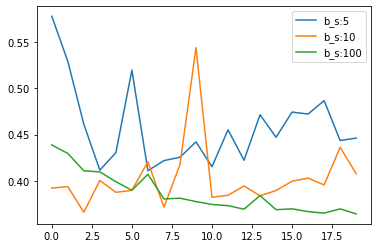

In [ ]:
# parameter tuning

for batch_size in [5, 10, 100]:
    learning_rate = 0.1

    model_single_layer = Sequential()
    model_single_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

    model_single_layer.compile(loss="binary_crossentropy", 
                  optimizer=SGD(lr=learning_rate), 
                  metrics=["accuracy"])

    train_history = model_single_layer.fit(train_data_matrix, 
                                           train_labels, 
                                           epochs=20, 
                                           batch_size=batch_size, 
                                           verbose=0,
                                           validation_data=(test_data_matrix, test_labels)
                                           )

#     loss = train_history.history['loss']
    val_loss = train_history.history['val_loss']
#     plt.plot(loss, )
    plt.plot(val_loss, label="b_s:{}".format(batch_size))
plt.legend()
plt.show()

In [ ]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

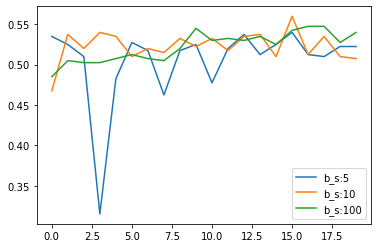

In [ ]:
# parameter tuning

for batch_size in [5, 10, 100]:
    learning_rate = 0.1

    model_single_layer = Sequential()
    model_single_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

    model_single_layer.compile(loss="binary_crossentropy", 
                  optimizer=SGD(lr=learning_rate), 
                  metrics=["accuracy"])

    train_history = model_single_layer.fit(train_data_matrix, 
                                           train_labels, 
                                           epochs=20, 
                                           batch_size=batch_size, 
                                           verbose=0,
                                           validation_data=(test_data_matrix, test_labels)
                                           )

#     loss = train_history.history['loss']
    val_loss = train_history.history['val_accuracy']
#     plt.plot(loss, )
    plt.plot(val_loss, label="b_s:{}".format(batch_size))
plt.legend()
plt.show()

In [ ]:
# batch size 100 has the best performance